# Logistic Regression – Binary Classification

## 0.Importing the libraries

In [ ]:
import numpy as np
import pandas as pd
from sklearn.model_selection import train_test_split
from sklearn.preprocessing import StandardScaler
from sklearn.linear_model import SGDClassifier
from sklearn.impute import SimpleImputer
from sklearn.metrics import accuracy_score, confusion_matrix, ConfusionMatrixDisplay
import matplotlib.pyplot as plt

## 1. Importing the dataset

In [ ]:
data = pd.read_csv('diabetes.csv')
df = pd.DataFrame(data)

print(data.head())

   Pregnancies  Glucose  BloodPressure  SkinThickness  Insulin   BMI  \
0            6      148             72             35        0  33.6   
1            1       85             66             29        0  26.6   
2            8      183             64              0        0  23.3   
3            1       89             66             23       94  28.1   
4            0      137             40             35      168  43.1   

   DiabetesPedigreeFunction  Age  Outcome  
0                     0.627   50        1  
1                     0.351   31        0  
2                     0.672   32        1  
3                     0.167   21        0  
4                     2.288   33        1  


## 2. Separate features (X) and target (y)

In [ ]:
X = df.iloc[:, ]
y = df.iloc[:, -1]

print(X.head())
print(y.head())

   Pregnancies  Glucose  BloodPressure  SkinThickness  Insulin   BMI  \
0            6      148             72             35        0  33.6   
1            1       85             66             29        0  26.6   
2            8      183             64              0        0  23.3   
3            1       89             66             23       94  28.1   
4            0      137             40             35      168  43.1   

   DiabetesPedigreeFunction  Age  Outcome  
0                     0.627   50        1  
1                     0.351   31        0  
2                     0.672   32        1  
3                     0.167   21        0  
4                     2.288   33        1  
0    1
1    0
2    1
3    0
4    1
Name: Outcome, dtype: int64


## 3. Handle missing values

In [ ]:
cols_to_replace_zero = ['Glucose', 'BloodPressure', 'SkinThickness', 'Insulin', 'BMI']
X[cols_to_replace_zero] = X[cols_to_replace_zero].replace(0, np.nan)

imputer = SimpleImputer(strategy='median')
X[cols_to_replace_zero] = imputer.fit_transform(X[cols_to_replace_zero])

## 4. Split the data into training and testing sets

In [ ]:
X_train, X_test, y_train, y_test = train_test_split (X, y, test_size=0.2, random_state=42)

## 5. Feature scaling

In [ ]:
scaler = StandardScaler()

X_train_scaled = scaler.fit_transform(X_train)
X_test_scaled = scaler.transform(X_test)

## 6. Training the Logistic Regression model on the Training set

In [ ]:
sgd_model = SGDClassifier(loss='log_loss', learning_rate='optimal', max_iter=1, tol=None, random_state=42)

n_epochs = 15
train_acc_list = []
test_acc_list = []

classes = np.unique(y_train)

for epoch in range(n_epochs):

    sgd_model.partial_fit (X_train_scaled, y_train, classes=classes)

    y_train_pred = sgd_model.predict(X_train_scaled)
    y_test_pred = sgd_model.predict(X_test_scaled)

    train_acc = accuracy_score(y_train, y_train_pred)
    test_acc = accuracy_score(y_test, y_test_pred)

    train_acc_list.append (train_acc)
    test_acc_list.append (test_acc)

    print(f"[Epoch {epoch+1}] Train acc: {train_acc:.4f}  Test acc: {test_acc:.4f}")


[Epoch 1] Train acc: 1.0000  Test acc: 1.0000
[Epoch 2] Train acc: 1.0000  Test acc: 1.0000
[Epoch 3] Train acc: 1.0000  Test acc: 1.0000
[Epoch 4] Train acc: 1.0000  Test acc: 1.0000
[Epoch 5] Train acc: 1.0000  Test acc: 1.0000
[Epoch 6] Train acc: 1.0000  Test acc: 1.0000
[Epoch 7] Train acc: 1.0000  Test acc: 1.0000
[Epoch 8] Train acc: 1.0000  Test acc: 1.0000
[Epoch 9] Train acc: 1.0000  Test acc: 1.0000
[Epoch 10] Train acc: 1.0000  Test acc: 1.0000
[Epoch 11] Train acc: 1.0000  Test acc: 1.0000
[Epoch 12] Train acc: 1.0000  Test acc: 1.0000
[Epoch 13] Train acc: 1.0000  Test acc: 1.0000
[Epoch 14] Train acc: 1.0000  Test acc: 1.0000
[Epoch 15] Train acc: 1.0000  Test acc: 1.0000


## 7. Final model accuracy

In [ ]:
y_pred = sgd_model.predict(X_test_scaled)

print("Accuracy:", accuracy_score(y_test, y_pred))

Accuracy: 1.0


## 8. Feature weights extraction

In [ ]:
feature_names = X.columns
weights = sgd_model.coef_[0]

for name, weight in zip(feature_names, weights):
    print(f"{name:15}: {weight:.4f}")

Pregnancies    : 0.1151
Glucose        : 0.5620
BloodPressure  : 0.0691
SkinThickness  : 0.2710
Insulin        : -0.0806
BMI            : 0.4879
DiabetesPedigreeFunction: 0.3968
Age            : 0.4622
Outcome        : 16.1833


## 9. Visualization of Feature weights

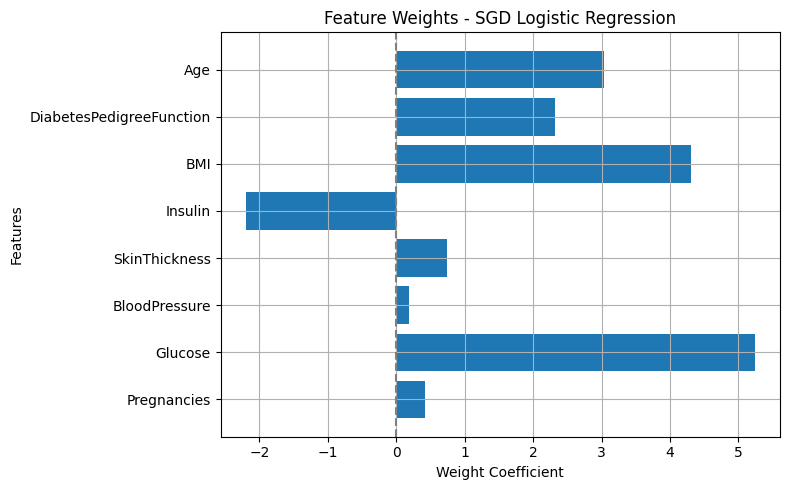

In [ ]:
plt.figure(figsize=(8, 5))
plt.barh(feature_names, weights)
plt.title('Feature Weights - SGD Logistic Regression')
plt.ylabel('Features')
plt.xlabel("Weight Coefficient")
plt.grid(True)
plt.axvline(0, color='gray', linestyle='--')
plt.tight_layout()
plt.show()

## 10. Visualization of Confusion matrix

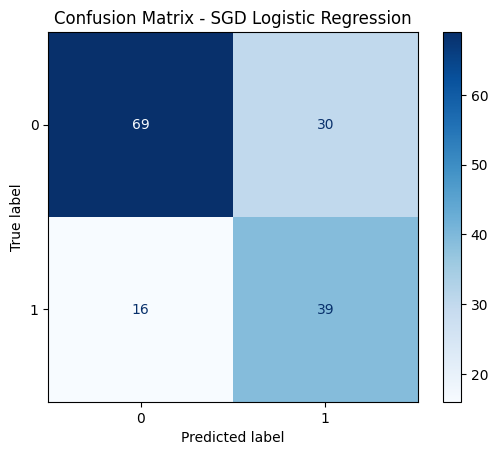

In [ ]:
cm = confusion_matrix(y_test, y_pred)
disp = ConfusionMatrixDisplay(confusion_matrix=cm)
disp.plot(cmap='Blues')
plt.title('Confusion Matrix - SGD Logistic Regression')
plt.show()